# DATA ANALYSIS -FRAUD DETECTION

In [1]:
#importing the important libraries and modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

Reading the csv file

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df_good_transactions=len(df[df['isFraud']==0])
df_bad_transactions=len(df[df['isFraud']==1])

In [8]:
good_percentage=((df_good_transactions)/(df_bad_transactions+df_good_transactions))*100
bad_percentage=((df_bad_transactions)/(df_bad_transactions+df_good_transactions))*100

In [9]:
print('percentage of good transactions',good_percentage)
print('percentage of bad transactions',bad_percentage)

percentage of good transactions 99.87091795518198
percentage of bad transactions 0.12908204481801522


Finding the numeric dtype in the csv file

In [10]:
numeric_list=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']

In [11]:
df_numeric=df[numeric_list]

In [12]:
df_numeric

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [13]:
correlation_matrix=df_numeric.corr()

In [14]:
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


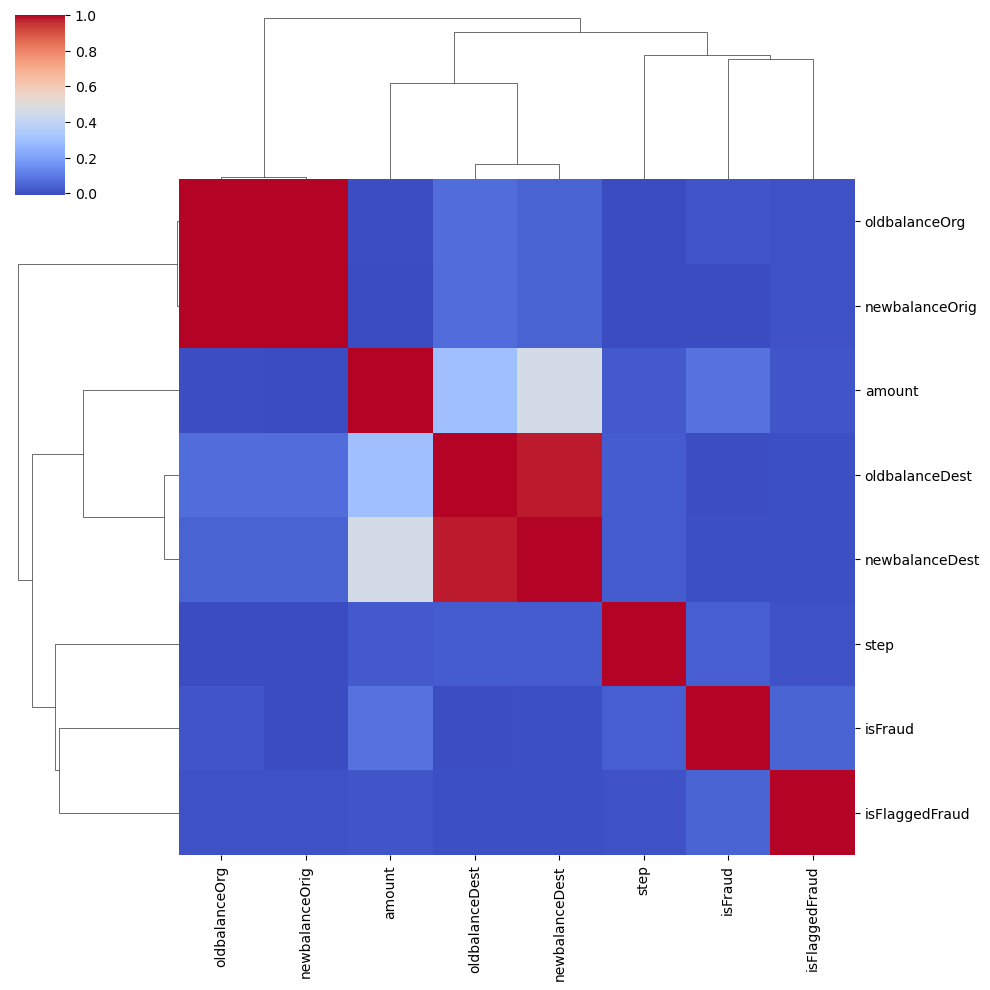

In [15]:
sns.clustermap(correlation_matrix,cmap='coolwarm')
plt.show()

SOLVING THE PROBLEM

Encoding the various not numerical atributes of the data

In [16]:
label_encoder=LabelEncoder()

In [17]:
#selecteing all the object datatypes
obj_list=df.select_dtypes(include='object').columns

In [18]:
obj_list

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [19]:
for column in obj_list:
    df[column]=label_encoder.fit_transform(df[column])

In [20]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


i dont think that nameOrig  and nameDest have much influence on the model

In [21]:
df=df.drop(['nameOrig','nameDest'],axis=1)

In the above clusterplot we notice that oldbalanceOrg and newbalanceOrig are highly correlated .Similarly oldbalanceDest and newbalanceDest are also higly correalted and hence i plan to combine them into one clumn to reduce the colinear nature

In [22]:
df['net_amount_org']=df.apply(lambda x:x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
df['net_amount_dest']=df.apply(lambda x:x['oldbalanceDest']-x['newbalanceDest'],axis=1)
df=df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step'],axis=1)
df

,type,amount,isFraud,isFlaggedFraud,net_amount_org,net_amount_dest
0,3,9839.64,0,0,9839.64,0.00
1,3,1864.28,0,0,1864.28,0.00
2,4,181.00,1,0,181.00,0.00
3,1,181.00,1,0,181.00,21182.00
4,3,11668.14,0,0,11668.14,0.00
...,...,...,...,...,...,...
6362615,1,339682.13,1,0,339682.13,-339682.13
6362616,4,6311409.28,1,0,6311409.28,0.00
6362617,1,6311409.28,1,0,6311409.28,-6311409.27
6362618,4,850002.52,1,0,850002.52,0.00


In [23]:
correlation_matrix=df.corr()

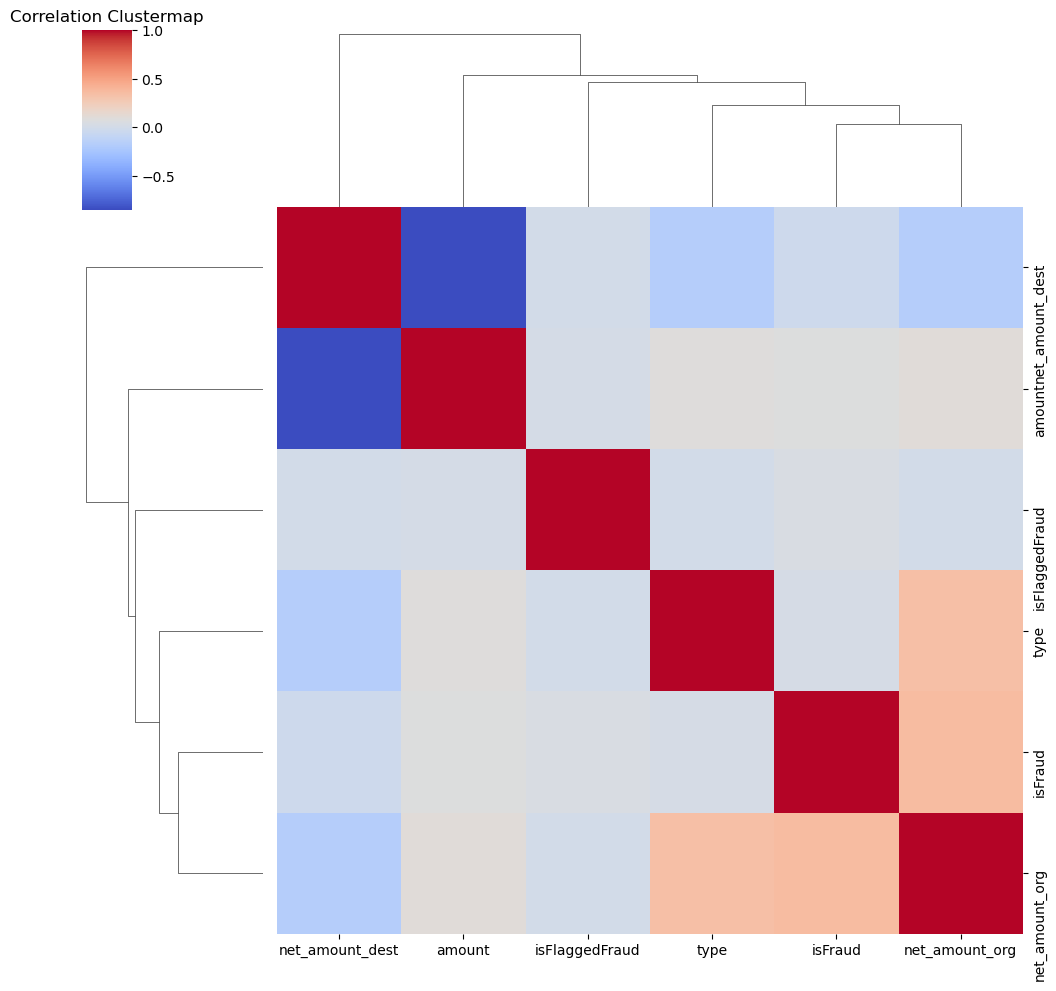

In [24]:
sns.clustermap(correlation_matrix,cmap='coolwarm')
plt.title('Correlation Clustermap')
plt.show()

we can notice that the Collinearity among the predictor variables have stopped hence we can apply the model now

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [26]:
y=df['isFraud']
X=df.drop('isFraud',axis=1)

In [27]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


USING THE ADABOOST CLASSIFIER

In [28]:
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [29]:
y_pred = adaboost_clf.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9992927441839997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.50      0.64      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.75      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [32]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 813
False Positives: 93
True Negatives: 1270811
False Negatives: 807


In developing my fraud detection model, I followed a structured approach encompassing data preprocessing, feature engineering, and model training. Initially, I conducted exploratory data analysis to comprehend the dataset's nuances, including any class imbalance issues. After encoding categorical variables and engineering new features like net transaction amounts, I refined the dataset to enhance the model's performance. Employing AdaBoostClassifier, an ensemble learning technique, I trained the model to discern fraudulent from non-fraudulent transactions effectively. Despite achieving an impressive overall accuracy of approximately 99.93%, a detailed analysis using classification metrics revealed areas for improvement, particularly in accurately identifying fraudulent transactions. While my model exhibited strength in accurately identifying non-fraudulent transactions (class 0), there's a need for optimization to enhance its performance in detecting fraudulent transactions (class 1), especially in terms of recall.

Assessing my model's performance extended beyond overall accuracy to include metrics like precision, recall, and F1-score, which provided valuable insights into its efficacy. While a high accuracy rate is noteworthy, a closer examination of class-specific metrics highlighted areas for refinement. My model demonstrated proficiency in correctly identifying non-fraudulent transactions, as evidenced by high precision and recall scores for class 0. However, its performance in detecting fraudulent transactions, particularly in terms of recall, indicates potential for enhancement. Moving forward, I intend to explore various optimization strategies such as fine-tuning model parameters, exploring alternative algorithms, or implementing advanced techniques to address class imbalance effectively. These efforts aim to bolster my model's fraud detection capabilities and ensure its robust performance in real-world scenarios.